In [4]:
import datetime as datetime
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import unidecode


import sklearn as sk
import xgboost 
from xgboost import XGBClassifier

from matplotlib import pyplot
from sklearn.utils import shuffle
from numpy import sort
from matplotlib import pyplot
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import accuracy_score, r2_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import StandardScaler
from lightgbm.sklearn import LGBMClassifier

In [5]:
train = pd.read_csv('../../train.csv', low_memory=False)

In [6]:
train["text"] = train["text"].str.lower()
train["text"] = train["text"].apply(lambda x: re.sub('(?P<url>https?://[^\s]+)', ' ', x))
train["text"] = train["text"].apply(lambda x: re.sub(r'[^\w]', ' ', x))
train["text"] = train["text"].apply(lambda x: re.sub(r'_', ' ', x))
train["text"] = train["text"].apply(lambda x: re.sub(r'[0-9]',' ', x))
train["text"] = train["text"].apply(lambda x: re.sub(' +',' ', x))
train["text"] = train["text"].apply(lambda x: unidecode.unidecode(x))
train["text"] = train["text"].str.strip()
train["text_length"] = train["text"].str.len()
train["text"] = train["text"].apply(lambda x: re.sub(r'\b\w{1}\b', '', x))
train["words_count"] = train["text"].str.split(' ').apply(lambda x: len(x))

train["keyword"] = train["keyword"].str.replace('%20',' ')

In [ ]:
#TENGO QUE PROBAR CON ONE HOT, BINARY, HASHING
#https://kiwidamien.github.io/encoding-categorical-variables.html
#https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

## One Hot Encoding

In [7]:
OHE = pd.get_dummies(train, prefix=['keyword'], columns=['keyword'])
OHE

,id,location,text,target,text_length,words_count,keyword_ablaze,keyword_accident,keyword_aftershock,keyword_airplane accident,...,keyword_weapons,keyword_whirlwind,keyword_wild fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,1,NaN,our deeds are the reason of this earthquake ma...,1,68,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,NaN,forest fire near la ronge sask canada,1,37,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,NaN,all residents asked to shelter in place are be...,1,130,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,NaN,people receive wildfires evacuation orders in ...,1,56,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,NaN,just got sent this photo from ruby alaska as s...,1,85,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,two giant cranes holding bridge collapse into...,1,60,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,10870,NaN,aria ahrary thetawniest the out of control wil...,1,121,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,10871,NaN,utc km of volcano hawaii,1,28,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,10872,NaN,police investigating after an bike collided w...,1,135,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = OHE.drop(["id","location","text","target"], axis=1)
target = OHE["target"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)

In [68]:
# feature selection
def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=chi2, k=100)
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs

In [125]:
x_train_fs, x_test_fs = select_features(x_train, y_train, x_test)

In [126]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 459.556255
Feature 1: 1.072001
Feature 2: 0.073017
Feature 3: 9.242362
Feature 4: 19.869592
Feature 5: 21.726208
Feature 6: 2.203909
Feature 7: 0.073017
Feature 8: 0.249703
Feature 9: 4.338200
Feature 10: 15.208132
Feature 11: 11.228390
Feature 12: 5.328916
Feature 13: 2.388950
Feature 14: 11.446758
Feature 15: 2.794602
Feature 16: 7.604066
Feature 17: 5.037842
Feature 18: 3.360389
Feature 19: 3.829424
Feature 20: 8.031076
Feature 21: 11.959509
Feature 22: 8.933566
Feature 23: 14.982430
Feature 24: 11.228390
Feature 25: 12.840903
Feature 26: 9.986276
Feature 27: 13.562986
Feature 28: 7.598215
Feature 29: 16.812732
Feature 30: 8.262177
Feature 31: 18.015047
Feature 32: 0.044372
Feature 33: 0.026931
Feature 34: 20.294078
Feature 35: 16.851605
Feature 36: 9.011522
Feature 37: 17.867556
Feature 38: 1.770314
Feature 39: 2.479717
Feature 40: 2.177271
Feature 41: 8.705541
Feature 42: 13.058312
Feature 43: 0.010799
Feature 44: 3.826319
Feature 45: 9.242362
Feature 46: 0.472857
Featu

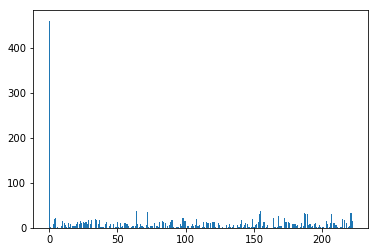

In [127]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [128]:
# feature selection
def select_features2(x_train, y_train, x_test):
    fs2 = SelectKBest(score_func=mutual_info_classif, k=100)
    fs2.fit(x_train, y_train)
    x_train_fs2 = fs2.transform(x_train)
    x_test_fs2 = fs2.transform(x_test)
    return x_train_fs2, x_test_fs2, fs2

In [129]:
x_train_fs2, x_test_fs2, fs2 = select_features2(x_train, y_train, x_test)

In [130]:
# what are scores for the features
for i in range(len(fs2.scores_)):
    print('Feature %d: %f' % (i, fs2.scores_[i]))

Feature 0: 0.024161
Feature 1: 0.022467
Feature 2: 0.013428
Feature 3: 0.008017
Feature 4: 0.000000
Feature 5: 0.001545
Feature 6: 0.003808
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.003130
Feature 10: 0.010335
Feature 11: 0.000000
Feature 12: 0.010731
Feature 13: 0.000000
Feature 14: 0.000000
Feature 15: 0.008241
Feature 16: 0.010332
Feature 17: 0.013086
Feature 18: 0.007646
Feature 19: 0.004078
Feature 20: 0.000000
Feature 21: 0.001351
Feature 22: 0.000000
Feature 23: 0.000000
Feature 24: 0.009378
Feature 25: 0.006218
Feature 26: 0.007545
Feature 27: 0.000000
Feature 28: 0.004073
Feature 29: 0.008326
Feature 30: 0.000000
Feature 31: 0.002657
Feature 32: 0.004906
Feature 33: 0.000000
Feature 34: 0.007939
Feature 35: 0.000000
Feature 36: 0.001717
Feature 37: 0.000000
Feature 38: 0.000000
Feature 39: 0.000000
Feature 40: 0.000000
Feature 41: 0.004731
Feature 42: 0.006864
Feature 43: 0.010430
Feature 44: 0.008303
Feature 45: 0.009028
Feature 46: 0.001362
Feature 47: 0.000000
Fe

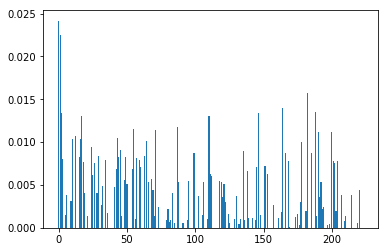

In [131]:
# plot the scores
pyplot.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
pyplot.show()

In [132]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
# evaluate the model
yhat = model.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 73.21


/home/martin/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [133]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train_fs, y_train)
# evaluate the model
yhat = model.predict(x_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 68.70


In [134]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train_fs2, y_train)
# evaluate the model
yhat = model.predict(x_test_fs2)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.39


# Logistic Regression

In [75]:
log_reg_grid_param = {'solver': ['liblinear'],
               'penalty': ['l1', 'l2'],
                "C": np.logspace(-4, 4, 20)}
# tuned hpyerparameters :(best parameters)  {'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}
# accuracy : 0.6773280120566767


#log_reg_grid_param = {'solver': ['liblinear', 'lbfgs', 'newton-cg'],
#                "C": np.logspace(-4, 4, 20)}
# tuned hpyerparameters :(best parameters)  {'C': 206.913808111479, 'solver': 'liblinear'}
# accuracy : 0.6762867722923174

#log_reg_grid_param = {'penalty': ['l1', 'l2'],
#                "C": np.logspace(-4, 4, 20)}
# tuned hpyerparameters :(best parameters)  {'C': 11.288378916846883, 'penalty': 'l1'}
# accuracy : 0.6773280120566767

In [38]:
def logisticReg(x_train, x_test, y_train, y_test, solver, penalty):
    logReg = LogisticRegression(solver=solver, penalty=penalty)
    logReg.fit(x_train, y_train)
    y_pred = logReg.predict(x_test)
    return mean_absolute_error(y_test, y_pred)

In [70]:
logisticReggesion = LogisticRegression()

In [76]:
logistic_GS = GridSearchCV(estimator=logisticReggesion, param_grid=log_reg_grid_param, verbose=1, scoring="f1", cv=5, n_jobs=-1)
logistic_GS.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logistic_GS.best_params_)
print("accuracy :",logistic_GS.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished
/home/martin/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


tuned hpyerparameters :(best parameters)  {'C': 11.288378916846883, 'penalty': 'l1'}
accuracy : 0.6773280120566767


# KNN

In [86]:
#knn_grid_param = {'n_neighbors': [3,5,11,19],
#               'algorithm': ['auto'],
#               'metric': ['manhattan', 'euclidean'],
#                'weights': ['uniform', 'distance']}
# tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
# accuracy : 0.5584487464918637

#knn_grid_param = {'n_neighbors': [11,19,25,30],
#               'algorithm': ['auto'],
#               'metric': ['manhattan', 'euclidean'],
#                'weights': ['uniform', 'distance']}
# tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
# accuracy : 0.5584487464918637

#knn_grid_param = {'n_neighbors': [14,15,16,17,18,19,20],
#               'algorithm': ['auto'],
#               'metric': ['manhattan', 'euclidean'],
#                'weights': ['uniform', 'distance']}
# tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
# accuracy : 0.5602674085086873

knn_grid_param = {'n_neighbors': [17,50,100,150,200],
               'algorithm': ['auto'],
               'metric': ['manhattan', 'euclidean'],
                'weights': ['uniform', 'distance']}
# tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
# accuracy : 0.5602674085086873

In [47]:
knnClassifier = KNeighborsClassifier()

In [87]:
knn_GS = GridSearchCV(estimator=knnClassifier, param_grid=knn_grid_param, verbose=1, scoring="f1", cv=5, n_jobs=-1)
knn_GS.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",knn_GS.best_params_)
print("accuracy :",knn_GS.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s


tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
accuracy : 0.5602674085086873


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished


# Decision Tree

In [94]:
decision_tree_grid = {'max_depth': [20,40,60,80,100],
                     'min_samples_split': [2,4,6,8,10],
                     'min_samples_leaf': [1,2,5,10]}
# tuned hpyerparameters :(best parameters)  {'max_depth': 80, 'min_samples_leaf': 1, 'min_samples_split': 2}
# accuracy : 0.5733099080349381

In [89]:
decisionClassifier = DecisionTreeClassifier()

In [95]:
decision_GS = GridSearchCV(estimator=decisionClassifier, param_grid=decision_tree_grid, scoring='f1', verbose=1, cv=5, n_jobs=-1)
decision_GS.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",decision_GS.best_params_)
print("accuracy :",decision_GS.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.0s


tuned hpyerparameters :(best parameters)  {'max_depth': 80, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.5733099080349381


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.4s finished


# Random Forest

In [18]:
#random_forest_grid_param = {'bootstrap': [True, False],
#                            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#                            'max_features': ['auto', 'sqrt'],
#                            'min_samples_leaf': [1, 2, 4],
#                            'min_samples_split': [2, 5, 10],
#                            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

#random_forest_grid_param = {'bootstrap': [True, False],
#                            'max_depth': [10, 20, 30, None],
#                            'max_features': ['auto', 'sqrt'],
#                            'min_samples_leaf': [1, 2, 4],
#                            'min_samples_split': [2, 5, 10],
#                            'n_estimators': [200, 400, 600]}
#tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
#accuracy : 0.653347094748209

#random_forest_grid_param = {'bootstrap': [True],
#                            'max_depth': [2, 4, 6, None],
#                            'max_features': ['sqrt'],
#                            'min_samples_leaf': [1, 5, 7],
#                            'min_samples_split': [9, 10, 11],
#                            'n_estimators': [50,100,200]}
#tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
#accuracy : 0.6534201199529246

random_forest_grid_param = {'bootstrap': [True],
                            'max_depth': [2, 4, 6, None],
                            'max_features': ['sqrt'],
                            'min_samples_leaf': [1,10,15],
                            'min_samples_split': [9, 10, 11],
                            'n_estimators': [20,30,50,75]}
#tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 20}
#accuracy : 0.6541641584525214

#random_forest_grid_param = {'bootstrap': [True],
#                            'max_depth': [50, 60, 70, None],
#                            'max_features': ['sqrt'],
#                            'min_samples_leaf': [1,2,3],
#                            'min_samples_split': [9, 10, 11],
#                            'n_estimators': [5,9,12,15,20]}
#tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 15}
#accuracy : 0.6492213934204937

In [14]:
rfClassifier = RandomForestClassifier()

In [19]:
rf_GS = GridSearchCV(estimator=rfClassifier, param_grid=random_forest_grid_param, scoring='f1', verbose=1, cv=5, n_jobs=-1)
rf_GS.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",rf_GS.best_params_)
print("accuracy :",rf_GS.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   33.4s finished


tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 15}
accuracy : 0.6492213934204937


# Ada Boost

In [31]:
ada_grid = {'n_estimators': np.arange(280,400,10),
            'learning_rate' : [0.01,0.05,0.1,0.3,0.7,1]}
#tuned hpyerparameters :(best parameters)  {'learning_rate': 1, 'n_estimators': 350}
#accuracy : 0.6775816558491128

In [24]:
ada = AdaBoostClassifier()

In [32]:
ada_GS = GridSearchCV(estimator=ada, param_grid=ada_grid, scoring='f1', verbose=1, cv=5, n_jobs=-1)
ada_GS.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",ada_GS.best_params_)
print("accuracy :",ada_GS.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  5.6min finished


tuned hpyerparameters :(best parameters)  {'learning_rate': 1, 'n_estimators': 350}
accuracy : 0.6775816558491128


# XGBoost

In [11]:
#xgb_grid_param = {
#    'max_depth': [5,7,9],
#    'gamma': [0.5, 1, 1.5],
#    'subsample': [0.4,0.5,0.6], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#    'min_child_weight': [1,3,4],
#    'colsample_bytree': [0.5,0.6,0.7], #[0.5,0.6,0.7,0.8],
#    'n_estimators': [100, 200], #[1000,2000,3000]
#    'learning_rate': [0.1, 1]}
#tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 
#    'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.5}
#accuracy : 0.670547740462945

#xgb_grid_param = {
#    'max_depth': [9,12],
#    'gamma': [0.9,1,1.2],
#    'subsample': [0.5,0.8], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#    'min_child_weight': [1,3,4],
#    'colsample_bytree': [0.7,0.9], #[0.5,0.6,0.7,0.8],
#    'n_estimators': [200,350], #[1000,2000,3000]
#    'learning_rate': [0.1, 0.5]}
#tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.9, 'gamma': 1.2, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 350, 'subsample': 0.8}
#accuracy : 0.6696604992524797

xgb_grid_param = {
    'max_depth': [9],
    'gamma': [1,1.2],
    'subsample': [0.8,1], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'min_child_weight': [1,2],
    'colsample_bytree': [0.7,0.9], #[0.5,0.6,0.7,0.8],
    'n_estimators': [600], #[1000,2000,3000]
    'learning_rate': [0.1]}
#tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.9, 'gamma': 1.2, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 600, 'subsample': 0.8}
#accuracy : 0.6681432627951468

In [9]:
xgboost = XGBClassifier()

In [12]:
xgboost_GS = GridSearchCV(estimator=xgboost, param_grid=xgb_grid_param, scoring='f1', verbose=1, cv=5, n_jobs=-1)
xgboost_GS.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",xgboost_GS.best_params_)
print("accuracy :",xgboost_GS.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.9min finished


tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.9, 'gamma': 1.2, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 600, 'subsample': 0.8}
accuracy : 0.6681432627951468


# Light GBM

In [19]:
#gbm_param = {'n_estimators': [100, 400],
#               'max_depth':  [-1, 4, 10],
#               'num_leaves': [15, 31, 63, 127],
#               'subsample': [0.6, 0.7, 0.8],
#               'colsample_bytree': [0.6, 0.7, 0.8]}
#tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.6, 'max_depth': 10, 'n_estimators': 400, 
#'num_leaves': 15, 'subsample': 0.6}
#accuracy : 0.6008785161044997

#gbm_param = {'n_estimators': [400, 600, 1000],
#               'max_depth':  [-1, 10, 30],
#               'num_leaves': [3,6,9,12,15],
#               'subsample': [0.5,0.6, 0.7],
#               'colsample_bytree': [0.5,0.6, 0.7]}
#tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.6, 'max_depth': -1, 'n_estimators': 1000, 'num_leaves': 15, 'subsample': 0.5}
#accuracy : 0.6040637466465371

gbm_param = {'n_estimators': [1000,1500,2000],
               'max_depth':  [-1, 10, 30, 50],
               'num_leaves': [9,12,15,17,20],
               'subsample': [0.3,0.4,0.5,0.6],
               'colsample_bytree': [0.5,0.6, 0.7]}
#tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.6, 'max_depth': -1, 'n_estimators': 1000, 'num_leaves': 15, 'subsample': 0.3}
#accuracy : 0.6040637466465371

In [14]:
gbm = LGBMClassifier()

In [20]:
gbm_GS = GridSearchCV(estimator=gbm, param_grid=gbm_param, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gbm_GS.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gbm_GS.best_params_)
print("accuracy :",gbm_GS.best_score_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 17.3min finished


tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.6, 'max_depth': -1, 'n_estimators': 1000, 'num_leaves': 15, 'subsample': 0.3}
accuracy : 0.6040637466465371
